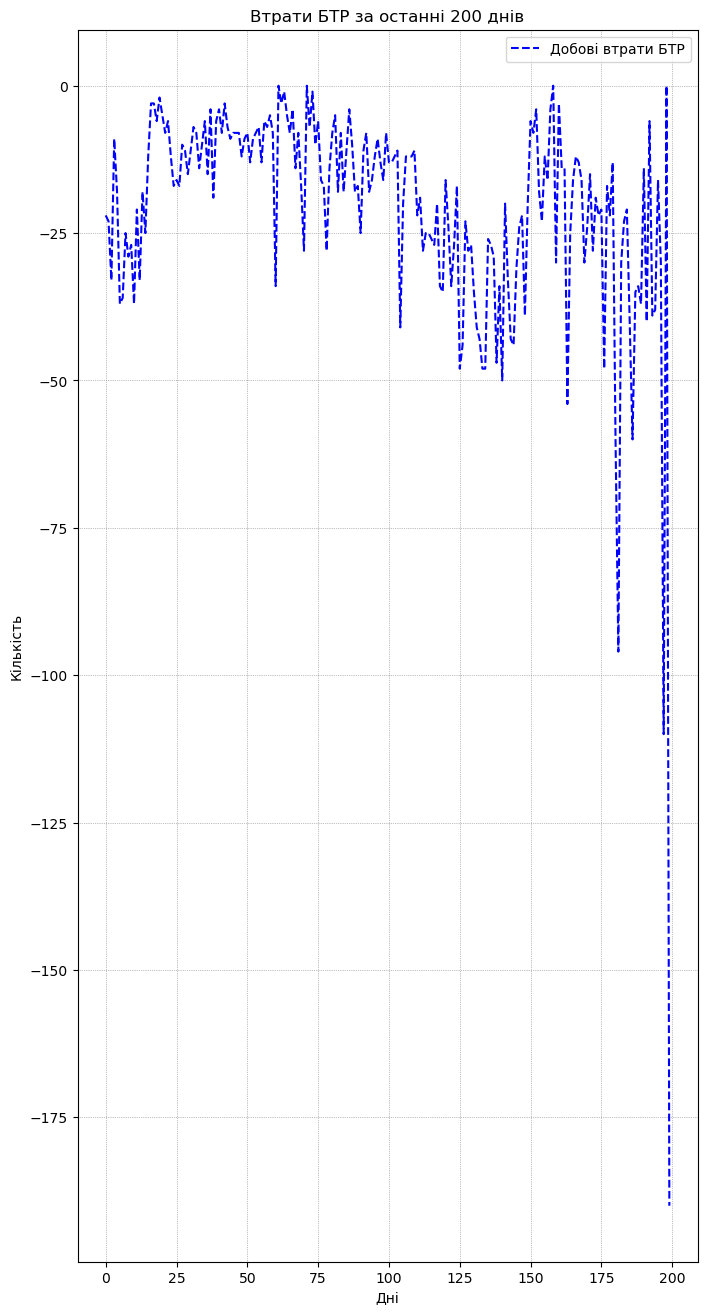

Добові втрати БТР: [ -14  -16  -33 ... -110    0 -190]
5 найбільших добових втрат БТР: [ 0  0  0  0 14]
Кількість знищених БТР влітку 2023 року: -1132
Середнє значення знищених БТР за 100-500 днів: -21.335


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Функція для завантаження стовпця
def load_column(file_name, column_name):
    data = pd.read_csv(file_name)
    return data[column_name].values

# 2. Завантаження даних для БТР
file_name = './data/russia_losses_equipment.csv'
column_name = 'APC'
apc_data = load_column(file_name, column_name)

# 3. Обчислення добових втрат БТР
daily_losses = np.diff(apc_data)

# 4. Пошук 5 найбільших добових втрат БТР
largest_losses = np.sort(daily_losses)[-5:]

# 5. Знищені БТР влітку 2023 року
dates = pd.to_datetime(pd.read_csv(file_name)['date'])
summer_2023 = (dates >= '2023-06-01') & (dates <= '2023-08-31')
summer_2023_losses = daily_losses[summer_2023[:-1]].sum()

# 6. Середнє значення знищених БТР за 100-500 днів війни
average_losses = daily_losses[100:500].mean()

# 7. Графік втрат БТР за останні 200 днів
last_200_days = daily_losses[-200:]
plt.figure(figsize=(8, 16), dpi=100)
plt.plot(last_200_days, label="Добові втрати БТР", linestyle="--", color="blue")
plt.title("Втрати БТР за останні 200 днів")
plt.xlabel("Дні")
plt.ylabel("Кількість")
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.legend()
plt.savefig("btr_losses.png")
plt.show()

# Результати
print("Добові втрати БТР:", daily_losses)
print("5 найбільших добових втрат БТР:", largest_losses)
print("Кількість знищених БТР влітку 2023 року:", summer_2023_losses)
print("Середнє значення знищених БТР за 100-500 днів:", average_losses)
